## Pair Programming Visualización I

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.
Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import matplotlib.colors as mcolors

In [4]:
df_ataques = pd.read_csv("../Panda/datos_sincolumnas.csv")
df_ataques.head(2)

,Case Number,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [45]:
columnas_min = {col:col.lower().replace(" ","_") for col in df_ataques.columns}
df_ataques.rename(columns = columnas_min, inplace=True)

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [37]:
df_p=pd.DataFrame(df_ataques["sex_"].value_counts()).reset_index()
df_p.head()

,index,sex_
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1


In [46]:
df_p.rename(columns={"sex_":"cantidad"},inplace=True)
df_p.head()

,index,cantidad
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1


In [47]:
df_p.columns

Index(['index', 'cantidad'], dtype='object')

In [38]:
x= df_p["index"]
y = df_p["sex_"]

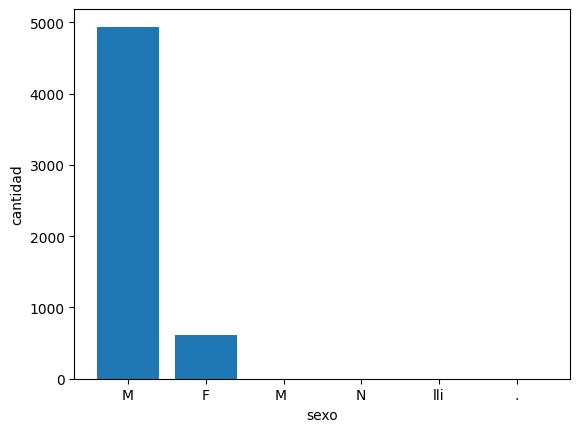

In [44]:
plt.figure()
plt.bar(x , y)
plt.xlabel("sexo")
plt.ylabel("cantidad")
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación

In [48]:
df_ataques.isnull().sum()

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [52]:
df_nulos= pd.DataFrame(df_ataques.isnull().sum()).reset_index()
df_nulos.head()

,index,0
0,case_number,1
1,unnamed:_0,0
2,year,0
3,type,4
4,country,40


In [56]:
df_nulos.rename(columns={0:"cantidad"},inplace=True)
df_nulos.head()

,index,cantidad
0,case_number,1
1,unnamed:_0,0
2,year,0
3,type,4
4,country,40


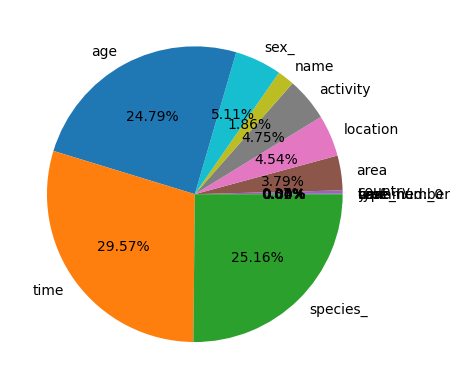

In [58]:
plt.figure()
plt.pie(df_nulos["cantidad"], labels=df_nulos["index"] ,autopct="%1.2f%%")
plt.show()

**3**. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [59]:
df_ataques.columns

Index(['case_number', 'unnamed:_0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_',
       'href'],
      dtype='object')

In [60]:
dicc1= {}
dicc2= {}
dicc3= {}
dicc4= {}
dicc5= {}
dicc6= {}
dicc7= {}
dicc8= {}
dicc9= {}
dicc10= {}
dicc11= {}
dicc12= {}
dicc13= {}
dicc14= {}

In [62]:
# Con un for vamos añadiendo a los diccionarios las variables y sus valores.
for col in df_ataques.columns:
    if col == 'case_number':
        dicc2.setdefault(col, df_ataques[col].value_counts())
    elif col == 'unnamed:_0':
        dicc3.setdefault(col, df_ataques[col].value_counts())
    elif col == 'year':
        dicc4.setdefault(col, df_ataques[col].value_counts())
    elif col == 'type':
        dicc5.setdefault(col, df_ataques[col].value_counts())
    elif col == 'country':
        dicc6.setdefault(col, df_ataques[col].value_counts())
    elif col == 'area':
        dicc7.setdefault(col, df_ataques[col].value_counts())
    elif col == 'location':
        dicc8.setdefault(col, df_ataques[col].value_counts())
    elif col == 'activity':
        dicc9.setdefault(col, df_ataques[col].value_counts())
    elif col == 'name':
        dicc10.setdefault(col, df_ataques[col].value_counts())
    elif col == 'sex_':
        dicc11.setdefault(col, df_ataques[col].value_counts())
    elif col == 'age':
        dicc12.setdefault(col, df_ataques[col].value_counts())
    elif col == 'time':
        dicc13.setdefault(col, df_ataques[col].value_counts())
    elif col == 'species_':
        dicc14.setdefault(col, df_ataques[col].value_counts())
    elif col == 'href':
        dicc14.setdefault(col, df_ataques[col].value_counts())

**4**. Filtrad los datos para quedarnos solo con los datos de USA.
- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

**5.** Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.